# 다항회귀

## 다항식 특성으로 변환

In [1]:
# sampel [[0,1][2, 3]] 변환 연습

import numpy as np

In [2]:

X = np.array([2, 3])
X = X.reshape(-1, 2)
X

array([[2, 3]])

In [3]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly.transform(X)

array([[1., 2., 3., 4., 6., 9.]])

In [4]:
print(poly.get_feature_names_out())

['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']


## 사이킷런으로 다항 회귀 분석

In [5]:
#1) 데이터 준비: 데이터를 생성하여 탐색 및 확인

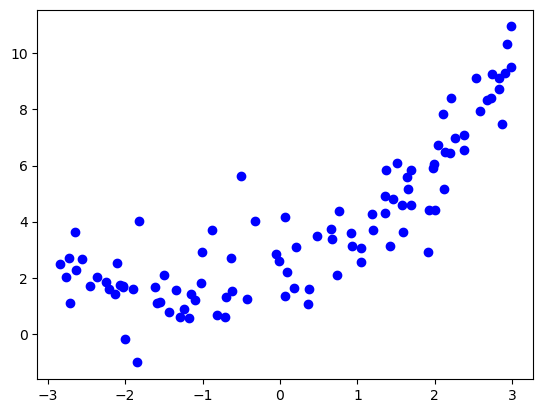

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(28)
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1)

plt.scatter(X, y, color='blue')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

xx = np.linspace(X.min()-0.1, X.max()+0.1).reshape(-1, 1)

In [8]:
# 2) 단순 선형 회귀 분석 및 시각화 : 비교 목적

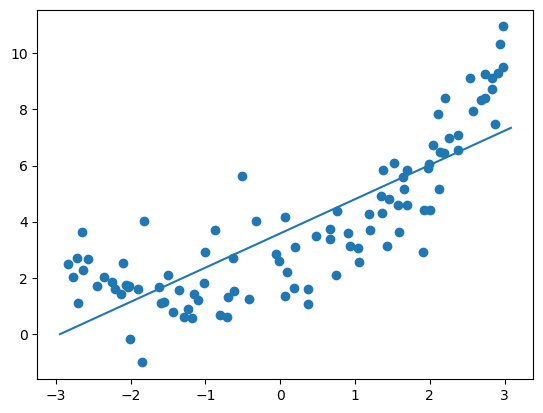

In [9]:
from sklearn.linear_model import LinearRegression

X1_train = X
y_train = y

reg1 = LinearRegression()
reg1.fit(X1_train, y_train)
xx = np.linspace(X.min()-0.1, X.max()+0.1).reshape(-1, 1)
yy = reg1.predict(xx)

plt.plot(xx, yy)
plt.scatter(X, y)

In [10]:
# 3) 2차항 형태로 다항 회귀 수행

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X2_train = poly.fit_transform(X)
y_train = y

In [12]:
X2_train

array([[ 1.00000000e+00,  1.37408245e+00,  1.88810259e+00],
       [ 1.00000000e+00,  3.67437614e-01,  1.35010400e-01],
       [ 1.00000000e+00, -2.25019745e+00,  5.06338855e+00],
       [ 1.00000000e+00, -6.14445788e-01,  3.77543626e-01],
       [ 1.00000000e+00,  1.68784924e+00,  2.84883505e+00],
       [ 1.00000000e+00,  6.59578899e-02,  4.35044324e-03],
       [ 1.00000000e+00, -1.90383985e+00,  3.62460617e+00],
       [ 1.00000000e+00,  2.12107725e+00,  4.49896871e+00],
       [ 1.00000000e+00,  2.73223136e+00,  7.46508818e+00],
       [ 1.00000000e+00,  2.90528081e+00,  8.44065658e+00],
       [ 1.00000000e+00, -1.84379416e+00,  3.39957689e+00],
       [ 1.00000000e+00,  2.82477061e+00,  7.97932899e+00],
       [ 1.00000000e+00, -1.59114987e+00,  2.53175792e+00],
       [ 1.00000000e+00, -2.84187691e+00,  8.07626437e+00],
       [ 1.00000000e+00,  2.67636206e+00,  7.16291387e+00],
       [ 1.00000000e+00,  2.53034911e+00,  6.40266663e+00],
       [ 1.00000000e+00, -1.23614539e+00

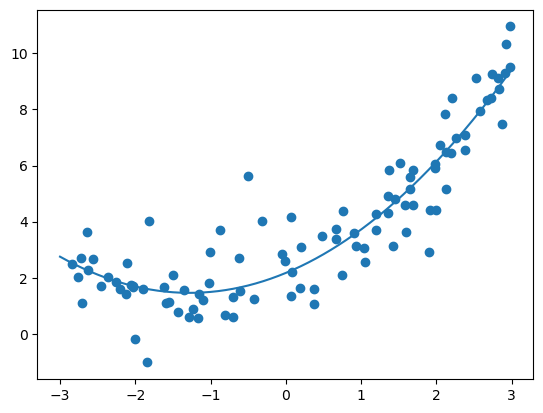

In [13]:
reg2 = LinearRegression()
reg2.fit(X2_train, y_train)
xx = np.arange(-3, 3, 0.01).reshape(-1, 1)
xx2 = poly.transform(xx)
yy = reg2.predict(xx2)

plt.scatter(X, y)
plt.plot(xx, yy)

In [14]:
# 구해진 2차식의 계수 확인
reg2.coef_, reg2.intercept_

(array([[0.        , 1.11284649, 0.43531499]]), array([2.17157426]))

In [15]:
# 4) 7차항 형태로 다항회귀 수행

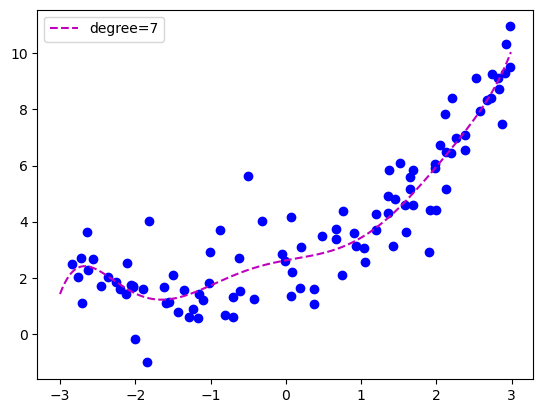

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=7)
X7_train = poly.fit_transform(X)
y_train = y

reg7 = LinearRegression().fit(X7_train, y_train)

xx = np.arange(-3, 3, 0.01).reshape(-1, 1)
xx7 = poly.transform(xx)
yy = reg7.predict(xx7)

plt.scatter(X, y, c='b')
plt.plot(xx, yy, c='m', linestyle='--', label='degree=7')
plt.legend()
plt.show()

In [17]:
# 각 차수별 그래프와 원본 데이터 비교 시각화

# pipeline 응용

In [18]:
# 데이터 변환과정과 머신러닝을 연결해줌

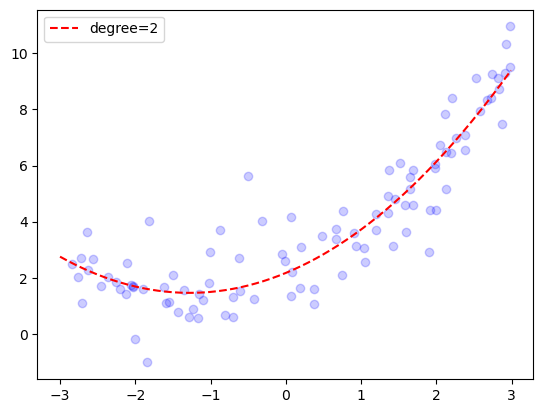

In [19]:
# 1) degree=2인 모델
from sklearn.pipeline import make_pipeline

reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()).fit(X, y)
xx = np.arange(-3, 3, 0.01)
yy = reg.predict(xx[:, np.newaxis])

plt.plot(xx, yy, color='r', linestyle='--', label='degree=2')
plt.scatter(X, y, color='b', alpha=0.2)
plt.legend()
plt.show()

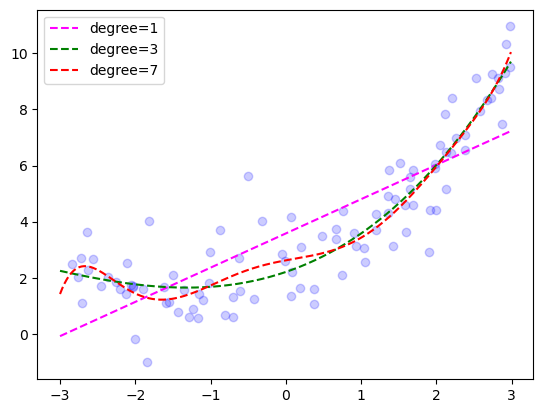

In [20]:
# 2) degree = [1, 3, 7]인 모델을 파이프라인으로 변환- 추정 통합

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 3, 7]
colors = ['magenta', 'green', 'red']

plt.scatter(X, y, color='b', alpha=0.2)
for i, d in enumerate(degree): 
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression()).fit(X, y)
    xx = np.arange(-3, 3, 0.01)
    yy = reg.predict(xx[:, np.newaxis])

    plt.plot(xx, yy, color=colors[i], linestyle='--', label='degree={}'.format(d))
    plt.legend()
plt.show()  

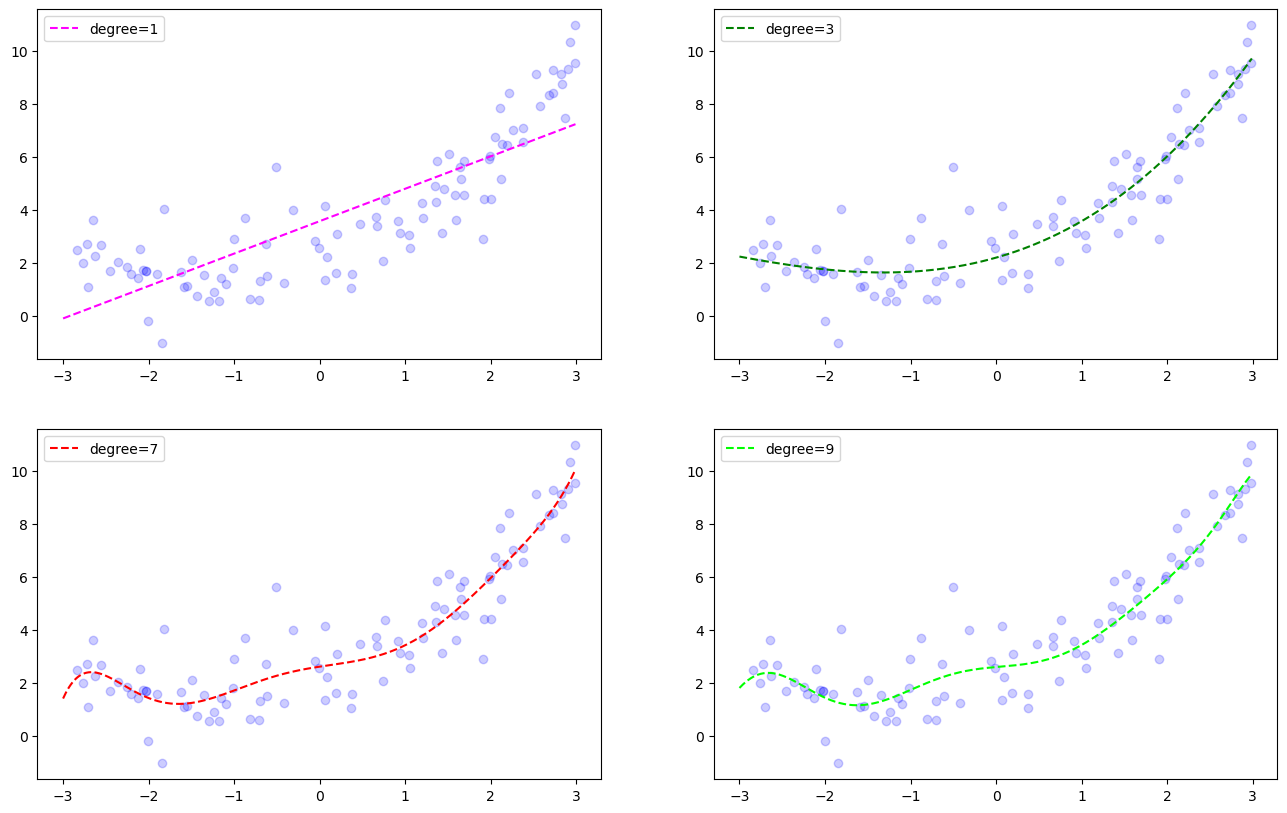

In [23]:
# 1, 2, 3, 7 나란히 그리기
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree = [1, 3, 7, 9]
colors = ['magenta', 'green', 'red', 'lime']


fig, ax = plt.subplots(2, 2, figsize=(16, 10))

for i, d in enumerate(degree):
    row = int(i/2)
    col = int(i%2)
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression()).fit(X, y)
    xx = np.arange(-3, 3, 0.01)
    yy = reg.predict(xx[:, np.newaxis])
    ax[row][col].scatter(X, y, color='b', alpha=0.2)
    ax[row][col].plot(xx, yy, color=colors[i], linestyle='--', label='degree={}'.format(d))
    ax[row][col].legend()
plt.show()  

# pipeline 실습

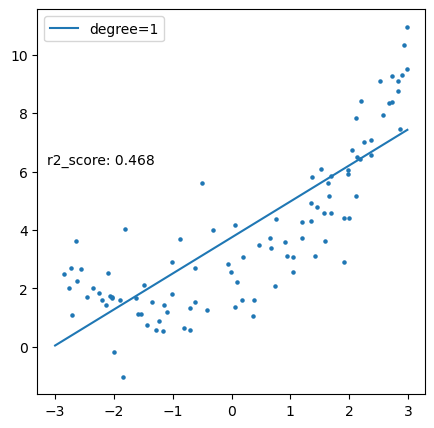

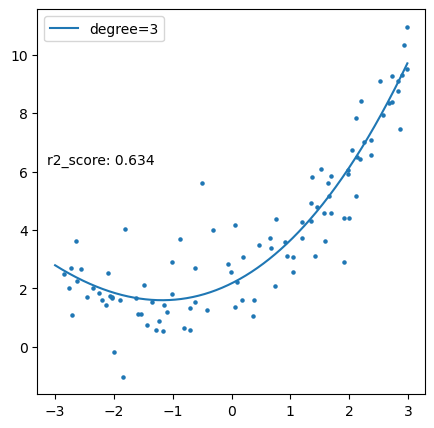

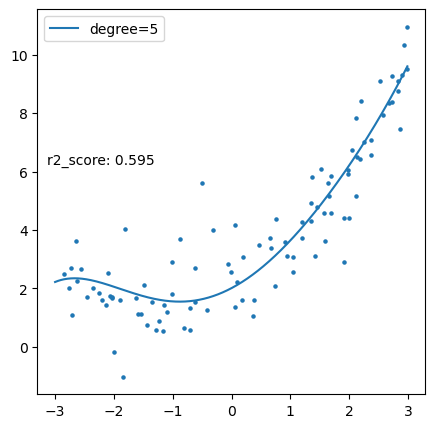

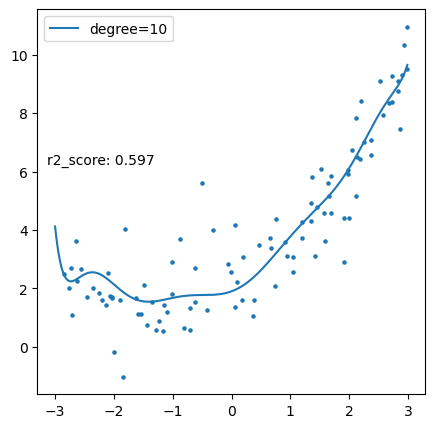

In [25]:
#################
##파이프라인 연습
####################
#다항식으로 데이터를 변환시키고 학습을 연결시키는 파이프라인 
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
## 학습용, 검증용 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
#xx = np.linspace(X.min()-0.1, X.max()+0.1).reshape(-1, 1)
xx = np.arange(-3, 3, 0.01).reshape(-1, 1)
degree=[1, 3, 5, 10]

for d in degree:
    reg = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    yy = reg.predict(xx)
    r2 = r2_score(y_test, y_pred)
    plt.figure(figsize=(5,5))
    plt.plot(xx, yy, label='degree={}'.format(d))
    plt.scatter(X, y, s=5)
    plt.legend()
    
    # 주석 표시 - 텍스트
    plt.annotate('r2_score: {:.3f} '.format(r2),  #텍스트 입력
                 xycoords= 'axes pixels',
                 xy=(10, 230),            #텍스트 위치 기준점
                 )
    

# [응용1] ]: 보스턴 집값 데이터셋을 활용한 다항회귀 실습 - 방의 갯수 VS 가격

### 필요한 모듈 import

In [2]:
#from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#### 데이터 수집

In [3]:
boston = pd.read_csv('./data/boston_room_price.csv')

#### 데이터 이해

#### 데이터 준비

In [15]:
# 독립변수, 종속변수를 데이터프레임으로 정리
X = boston.RM.values.reshape(-1, 1)  # 1차원 시리즈를 2차원 numpy array로 변환
y = boston.price

In [16]:
# 데이터프레임 확인
print(X)
print(X.values)

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [17]:
# 학습용, 검증용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
X_train[:10]

array([[5.949],
       [5.966],
       [6.794],
       [6.595],
       [3.561],
       [6.538],
       [6.064],
       [6.631],
       [7.82 ],
       [8.78 ]])

#### 모델 구축

In [19]:
# 시각화를 위한 xx 좌표계 미리 준비
# y축 좌표계는 각 모델마다 만듦
xx = np.linspace(X.min()-1, X.max()+1)  # 방의 갯수 최대값, 최소값

In [20]:
type(xx)

numpy.ndarray

In [28]:
# 2차식의 다항회귀
poly = PolynomialFeatures(degree=2)
X2_train = poly.fit_transform(X_train)
X2_test = poly.transform(X_test)

reg2 = lr.fit(X2_train, y_train)
y_pred2 = reg2.predict(X2_test)

print(reg2.coef_, reg2.intercept_)
xx2 = poly.transform(xx.reshape(-1, 1))
yy2 = reg2.predict(xx2)  # 산점도를 그리기 위해 xx에 해당하는 예측값 생성

[  0.         -23.79086549   2.54284549] 70.4588073471654


In [29]:
# 3차식의 다항회귀
poly = PolynomialFeatures(degree=3)
X3_train = poly.fit_transform(X_train)
X3_test = poly.transform(X_test)

reg3 = lr.fit(X3_train, y_train)
y_pred3 = reg3.predict(X3_test)

print(reg3.coef_, reg3.intercept_)
xx3 = poly.transform(xx.reshape(-1, 1))
yy3 = reg3.predict(xx3)  # 산점도를 그리기 위해 xx에 해당하는 예측값 생성

[   0.         -121.27686495   18.59069233   -0.86283235] 263.6623044802066


####  다항 회귀 시각화

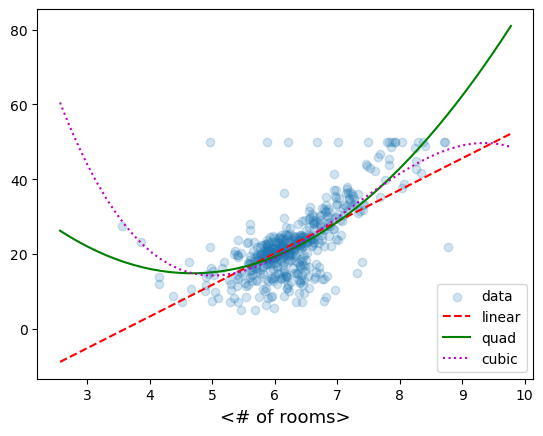

In [30]:
plt.scatter(X, y,alpha=0.2, label='data')
plt.plot(xx, yy1, c='r', ls='--', label='linear')
plt.plot(xx, yy2, c='g', label='quad')
plt.plot(xx, yy3, c='m', ls=':', label='cubic')

plt.xlabel('<# of rooms>', fontsize=13)
plt.legend(loc='lower right')


#### 모델 성능 평가

In [32]:

# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자
data = { 1 : r2_score(y_test, y_pred1),
         2 : r2_score(y_test, y_pred2),
         3 : r2_score(y_test, y_pred3) }
       
pd.Series(data)

1    0.601577
2    0.667063
3    0.666776
dtype: float64

# 당뇨병 데이터셋 중 체질량 지수와 진행도를 각각 입력 변수, 출력변수로 하고 다음을 구현하시오
- hint:
- 1) 데이터셋:load_diabetes
- 2) 체질량지수(bmi)를 가지고 단순 선형회귀, 2차, 3차 다항회귀를 수행하고, 가장 적합한 모델을 찾으시오
- 3) 데이터 분할 비율: 0.3, random_state=1
- 4) 차수별 시각화
- 5) 차수별 결정계수 비교

In [33]:
from sklearn.datasets import load_diabetes

In [34]:
diab = load_diabetes()
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
# 1) 데이터프레임으로 만들기


In [ ]:
# 선형 모델 객체 생성


In [ ]:
# 시각화를 위한 xx 좌표축 범위 확정



In [ ]:
# 차수별 모형 구축



In [ ]:
# 차수별 시각화

In [ ]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자


# [응용2] 당뇨병 데이터셋의 모든 특성을 조합해 2차 다항회귀식을 만들고, r2값을 비교해보시오 
- 당뇨병 진행도 VS. 모든 특성

In [36]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [68]:
from sklearn.datasets import load_diabetes
diab = load_diabetes()

In [69]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [70]:
data = pd.DataFrame(diab.data, columns=diab.feature_names)
X = data
y = diab.target

In [71]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=1)

In [80]:
# 선형 모델 객체 생성
lr = LinearRegression()

In [81]:
# 차수별 모형 구축

reg1 = lr.fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
r2_score1 = r2_score(y_test, y_pred1)


In [82]:
#2차 다항식
poly = PolynomialFeatures(degree=2)
X2_train = poly.fit_transform(X_train)
X2_test = poly.transform(X_test)

reg2 = lr.fit(X2_train, y_train)
y_pred2 = reg2.predict(X2_test)

print(reg2.coef_, reg2.intercept_)



[-2.52890170e-07 -1.02093421e+01 -2.93794550e+02  5.95553343e+02
  3.02501659e+02  4.82855552e+04 -4.25362567e+04 -1.83398179e+04
  2.22580499e+01 -1.52551681e+04  4.93166531e+01  1.77134145e+03
  2.58070692e+03  1.18996453e+03 -9.61752981e+02 -1.06850332e+04
  7.61716109e+03  8.00683423e+03  2.04074978e+03  2.36036111e+03
  2.78972381e+03 -1.77407316e+00  1.62749276e+03  1.44320788e+03
  1.72333765e+04 -1.52076213e+04 -5.24386705e+03 -1.87830325e+03
 -4.60385908e+03 -8.29535602e+02 -2.37198052e+03  6.90821109e+03
  1.20125117e+04 -8.74015818e+03 -8.47353266e+03 -2.84300792e+03
 -3.30916531e+03 -1.05920984e+03 -7.04766928e+02 -1.83270809e+04
  1.76357987e+04  6.61376131e+03 -1.94826428e+03  6.83138032e+03
 -1.66535440e+03  2.12572061e+05 -3.40021079e+05 -1.75741298e+05
 -4.13986476e+04 -3.30117343e+05 -1.44705107e+04  1.35385326e+05
  1.38400557e+05  2.42223169e+04  2.87791254e+05  9.64904239e+03
  3.62107359e+04  2.17292031e+04  1.23571921e+05  9.55391335e+03
  1.12887994e+04  1.23255

In [86]:

#3차 다항식
poly = PolynomialFeatures(degree=3)
X3_train = poly.fit_transform(X_train)
X3_test = poly.transform(X_test)

reg3 = lr.fit(X3_train, y_train)
y_pred3 = reg3.predict(X3_test)
print(r2_score(y_test, y_pred3))
#print(reg3.coef_, reg3.intercept_)


-424.3689017215976


In [77]:
### 어떤 항(특성)이 곱해지는지(만들어지는지) 알고 싶을 때
# diabetes의 특성 수: 10 -> 2차 다항식 변환 : 66개 -> 3차 다항식 변환:286개
poly = PolynomialFeatures(degree=2)
X_ploy = poly.fit_transform(X_train)
len(poly.get_feature_names_out())

66

In [78]:
### 어떤 항(특성)이 곱해지는지(만들어지는지) 알고 싶을 때
poly = PolynomialFeatures(degree=3)
X_ploy = poly.fit_transform(X_train)
len(poly.get_feature_names_out())

286

In [79]:
# 차수에 따른 r2(결정계수)를 시리즈로 만들어보자
data = { 1 : r2_score(y_test, y_pred1),
         2 : r2_score(y_test, y_pred2),
         3 : r2_score(y_test, y_pred3) }
       
pd.Series(data)

1      0.438454
2      0.212444
3   -424.368902
dtype: float64